<a href="https://colab.research.google.com/github/aayushmanda/da6401_assignment2/blob/main/da6401_1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/wandb_datasets/nature_12K.zip


--2025-03-28 16:35:51--  https://storage.googleapis.com/wandb_datasets/nature_12K.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3816687935 (3.6G) [application/zip]
Saving to: ‘nature_12K.zip’

nature_12K.zip      100%[===================>]   3.55G  66.5MB/s    in 36s     

2025-03-28 16:36:27 (102 MB/s) - ‘nature_12K.zip’ saved [3816687935/3816687935]



In [3]:
!unzip nature_12K.zip

train_dir='inaturalist_12K/train/'
test_dir='inaturalist_12K/val/'
categories=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']



Streaming output truncated to the last 5000 lines.
  inflating: inaturalist_12K/train/Arachnida/1ac25349af662e85f577a31f64beca41.jpg  
  inflating: inaturalist_12K/train/Arachnida/117ef7f1812725f359500448a258e713.jpg  
  inflating: inaturalist_12K/train/Arachnida/6409254954c3b46d88d64f0bf4c632fa.jpg  
  inflating: inaturalist_12K/train/Arachnida/aaed865750bd52944658a7dd23366948.jpg  
  inflating: inaturalist_12K/train/Arachnida/460cc09ef510d400a4d47a836ddd45e6.jpg  
  inflating: inaturalist_12K/train/Arachnida/55c48c3afef0b745e53951284cdb2db4.jpg  
  inflating: inaturalist_12K/train/Arachnida/bff3daa961ee96a37ebe12dc0bcce504.jpg  
  inflating: inaturalist_12K/train/Arachnida/9082d4f2107bccf1f14d71c8944be607.jpg  
  inflating: inaturalist_12K/train/Arachnida/93d0130423d42f7c6228150eb95a2a93.jpg  
  inflating: inaturalist_12K/train/Arachnida/051aba6d7bc324bad76bd438ed3cc276.jpg  
  inflating: inaturalist_12K/train/Arachnida/67595af09c015c7753d5d4935677590f.jpg  
  inflating: inaturalist_

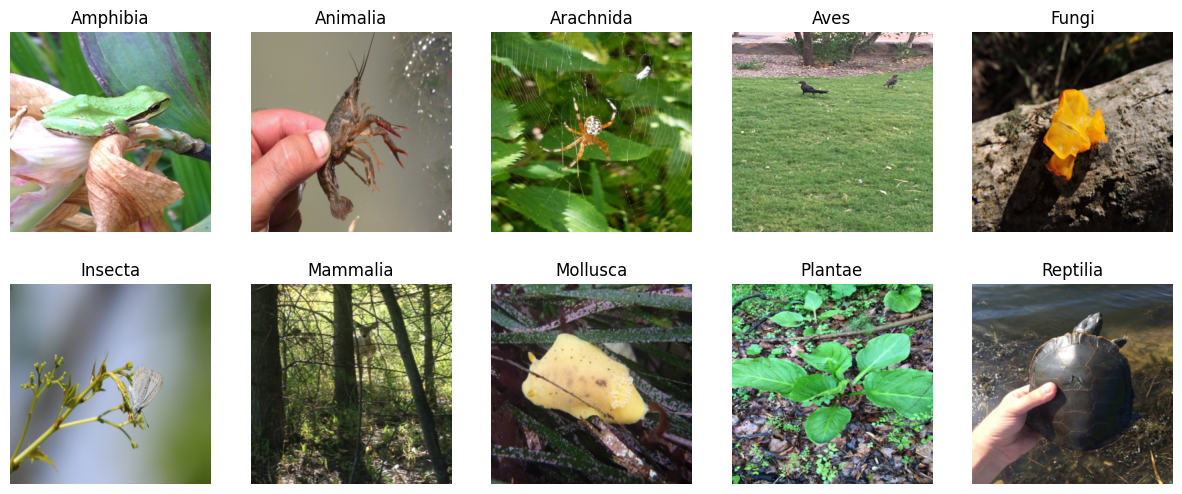

In [6]:
import torch
import torchvision
from torchvision.io import read_image
from torchvision.transforms import Resize, ToPILImage
import matplotlib.pyplot as plt

# Initialize figure
fig = plt.figure(figsize=(15, 6))
rows, columns = 2, 5
i = 1

# Loop through categories
for category in categories:
    dir_path = os.path.join(train_dir, category)

    for img_name in os.listdir(dir_path):
        img_path = os.path.join(dir_path, img_name)

        # Read image using PyTorch
        img_tensor = read_image(img_path)

        # Resize image using torchvision transforms
        resize_transform = Resize((300, 300))
        resized_img_tensor = resize_transform(img_tensor)

        # Convert tensor to PIL image for visualization
        pil_img = ToPILImage()(resized_img_tensor)

        # Add subplot and display image
        fig.add_subplot(rows, columns, i)
        plt.imshow(pil_img)
        plt.axis('off')
        plt.title(category)

        i += 1
        break  # Show only one image per category

plt.show()


In [14]:
# !ls 'inaturalist_12K/train/Amphibia'

In [10]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define directories
train_dir = 'inaturalist_12K/train/'
test_dir = 'inaturalist_12K/val/'

# Define transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Create datasets
image_datasets = {
    'train': datasets.ImageFolder(train_dir, data_transforms['train']),
    'val': datasets.ImageFolder(test_dir, data_transforms['val'])
}

# Create dataloaders
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=4, shuffle=True, num_workers=4),
    'val': DataLoader(image_datasets['val'], batch_size=4, shuffle=False, num_workers=4)
}

# Get dataset sizes
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

# Get class names
class_names = image_datasets['train'].classes

# Set device for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Print summary information
print(f"Training dataset size: {dataset_sizes['train']}")
print(f"Validation dataset size: {dataset_sizes['val']}")
print(f"Class names: {class_names}")
print(f"Using device: {device}")


Training dataset size: 9999
Validation dataset size: 2000
Class names: ['Amphibia', 'Animalia', 'Arachnida', 'Aves', 'Fungi', 'Insecta', 'Mammalia', 'Mollusca', 'Plantae', 'Reptilia']
Using device: cpu


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


AttributeError: 'ImageFolder' object has no attribute 'get_item'

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FlexibleCNN(nn.Module):
    def __init__(self, input_channels=3, num_classes=10, num_conv_layers=5, # Changed num_classes and num_conv_layers to smaller values
                 conv_filters=32, filter_size=3, activation_func=nn.ReLU,
                 dense_neurons=512):
        super(FlexibleCNN, self).__init__()

        self.conv_blocks = nn.ModuleList()
        in_channels = input_channels

        # Adding convolution-activation-maxpool blocks
        for _ in range(num_conv_layers):
            self.conv_blocks.append(nn.Sequential(
                nn.Conv2d(in_channels=in_channels, out_channels=conv_filters,
                          kernel_size=filter_size, stride=1, padding=filter_size//2),
                activation_func(),
                nn.MaxPool2d(kernel_size=2)
            ))
            in_channels = conv_filters

        # Flatten layer
        self.flatten = nn.Flatten()

        # Calculating input size for the first fully connected layer
        # Assuming input image size is 32x32
        input_size = conv_filters * (32 // (2**num_conv_layers))**2 # Calculate input size dynamically

        # Fully connected layers
        self.fc1 = nn.Linear(input_size, dense_neurons) # Use calculated input size
        self.fc2 = nn.Linear(dense_neurons, num_classes)

    def forward(self, x):
        for block in self.conv_blocks:
            x = block(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Example instantiation
model = FlexibleCNN(input_channels=3, num_classes=10, num_conv_layers=5, # Changed num_classes and num_conv_layers to smaller values
                    conv_filters=32, filter_size=3, activation_func=nn.ReLU,
                    dense_neurons=512)

print(model)

FlexibleCNN(
  (conv_blocks): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1-4): 4 x Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=32, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)
